# Install any required packages if necessary

In [1]:
!pip install -q tensorflow

# Suppressing TensorFlow warnings

In [2]:
%env TF_CPP_MIN_LOG_LEVEL=3

env: TF_CPP_MIN_LOG_LEVEL=3


# Import required libraries

In [3]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import warnings
warnings.filterwarnings('ignore')

# Downloading a sample image

In [4]:
!mkdir -p sample_images
!wget -O sample_images/dog.jpg https://raw.githubusercontent.com/pjreddie/darknet/master/data/dog.jpg

--2025-04-27 14:46:37--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 163759 (160K) [image/jpeg]
Saving to: ‘sample_images/dog.jpg’

sample_images/dog.j 100%[===================>] 159.92K  --.-KB/s    in 0.03s   

2025-04-27 14:46:38 (4.63 MB/s) - ‘sample_images/dog.jpg’ saved [163759/163759]



# Loading a sample image

In [11]:
imagem_path = 'sample_images/dog.jpg'

imagem = load_img(imagem_path)

imagem_array = img_to_array(imagem)
imagem_array = np.expand_dims(imagem_array, axis = 0)

# Configuring the Data Augmentation Generator

Define the parameters for random transformations to apply to input images during training.

This setup helps improve model generalization by introducing variability through rotation, shifts, shear, zoom, and horizontal flips.

The `fill_mode` determines how new pixels are filled after transformation:

In [12]:
# Set up the ImageDataGenerator with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=40,       # Random rotations up to 40 degrees
    width_shift_range=0.2,   # Horizontal shifts up to 20% of width
    height_shift_range=0.2,  # Vertical shifts up to 20% of height
    shear_range=0.2,         # Shear transformations
    zoom_range=0.2,          # Random zoom within the range
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill newly created pixels with nearest values
)

# Generating and Displaying Augmented Images

Use TensorFlow Keras `ImageDataGenerator` to produce augmented versions of a single input image.

The generator applies random transformations (such as rotation, shifting, zooming, etc.) based on the parameters configured earlier.

A grid of six augmented images is generated to visually confirm that the augmentations are being applied correctly:

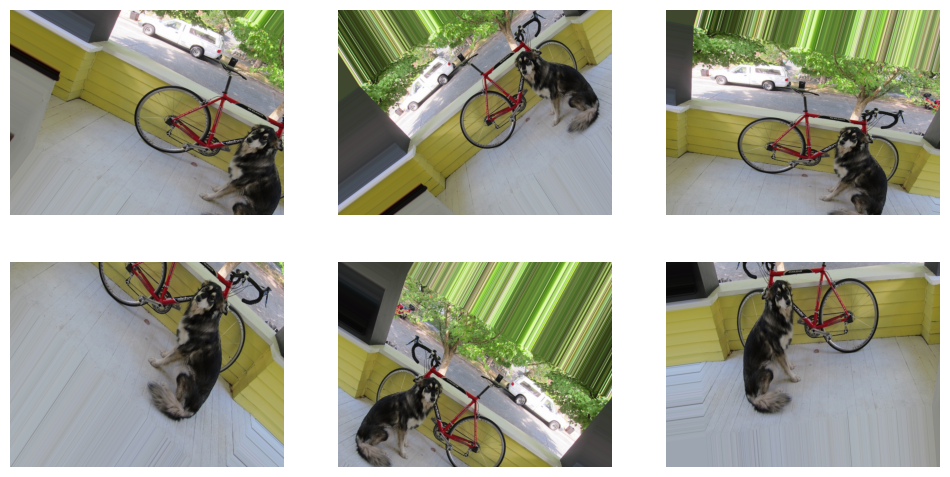

In [13]:
# Create a figure with a specific size
plt.figure(figsize=(12, 6))

# Loop over batches of augmented images (batch_size=1) and plot the first six
for i, batch in enumerate(datagen.flow(imagem_array, batch_size=1)):
    # Create a subplot in a 2x3 grid
    plt.subplot(2, 3, i + 1)
    # Display the image (rescale pixel values to [0,1])
    plt.imshow(img_to_array(batch[0]) / 255)
    plt.axis('off')  # Hide axes for clarity

    # Stop after generating 6 images
    if i >= 5:
        break

# Render the grid of images
plt.show()